# Health Analytics

### Prever o tempo de sobrevivência dos pacientes após receberem um Transplante de Fígado.

#### **Nota:** 
O conteúdo deste projeto analítico foi feito com apoio de uma pessoa que conhece a área da saúde. Pois é importante que o Analista ou Cientista de dados tenha ajuda dos profissionais que entendem da área ao qual o projeto está direcionado (acredito ser bom que o analista ou cientista de dados tenha algum conhecimento sobre o negócio em questão, porém sua funcão é analizar os dados e tirar insights que ajudem na tomada de decisão, ele não tem a obrigação de entender as regras de negócio de cada empreza, por isso é interessante que um profissional da área o acompanhe e forneça informações/auxílio a respeito do que será analisado).

Portanto, eu não quero dar a entender que eu tenho conhecimento a respeito da área da saúde, por isso deixei claro que recebi auxilio. Meu objetivo é demonstrar meu conhecimento sobre análise de dados com python.

**Importando pacotes necessários**

In [43]:
# base requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# tools
from datetime import datetime
import re

# my package
import datascience.dataset.analysis
Dataset = datascience.dataset.analysis.Dataset

In [2]:
ds = Dataset()

In [3]:
ds.read_csv('dados/dataset.csv')

Dataset(shape = (79100, 46))

In [4]:
ds.head(15)

,DAYSWAIT_CHRON,PSTATUS,FINAL_MELD_SCORE,PTIME,TX_DATE,PX_STAT,PX_STAT_DATE,AGE,ABO,GENDER,WGT_KG_TCR,HGT_CM_TCR,BMI_TCR,DIAB,INIT_AGE,ETHCAT,REGION,PERM_STATE,TX_Year,TX_PROCEDUR_TY,MED_COND_TRR,PREV_TX,AGE_DON,GENDER_DON,HGT_CM_DON_CALC,WGT_KG_DON_CALC,BMI_DON_CALC,COD_CAD_DON,ETHCAT_DON,HOME_STATE_DON,DIABETES_DON,HIST_HYPERTENS_DON,HIST_IV_DRUG_OLD_DON,ABO_DON,HIST_CANCER_DON,ALCOHOL_HEAVY_DON,ABO_MAT,COLD_ISCH,MALIG,HGT_CM_CALC,WGT_KG_CALC,BMI_CALC,TX_MELD,LISTYR,LiverSize,LiverSizeDon
0,7,0,39,51.0,12/24/2018,A,2/13/2019,30,O,1,56.24,162.60,21.27,1.0,30,1,2,MD,2018,701,1.0,N,24,1,173.0,75.0,25.06,3.0,2.0,PA,N,N,NaN,O,N,N,1,4.30,U,162.6,45.0,17.0,No,2018,1721.500,2276.860
1,5,0,19,6.0,12/23/2018,A,12/29/2018,63,A,0,81.92,177.80,25.91,1.0,63,1,3,GA,2018,701,3.0,N,34,0,183.0,90.0,26.87,3.0,1.0,GA,N,N,NaN,A,N,N,1,3.48,U,177.8,85.0,26.9,No,2018,1934.720,2387.360
2,10,0,22,6.0,12/28/2018,A,1/3/2019,48,B,0,78.93,181.10,24.06,1.0,48,1,10,OH,2018,701,3.0,N,42,1,173.0,107.0,35.75,1.0,1.0,NY,Y,Y,NaN,B,N,N,1,4.95,U,182.9,76.2,22.8,No,2018,1987.348,2555.460
3,9,0,35,27.0,12/27/2018,A,1/23/2019,54,O,1,63.50,154.94,26.45,1.0,54,1,4,TX,2018,701,2.0,N,48,1,157.0,93.0,37.73,2.0,1.0,TX,N,Y,NaN,O,N,N,1,3.62,U,154.9,61.1,25.5,No,2018,1669.494,2255.140
4,2,0,35,54.0,12/20/2018,A,2/12/2019,71,O,1,75.75,162.56,28.67,1.0,71,1,3,LA,2018,701,3.0,N,37,1,173.0,81.6,27.26,3.0,1.0,AR,N,N,NaN,O,N,N,1,7.50,U,162.6,70.8,26.8,No,2018,1605.492,2214.884
5,6,0,19,10.0,12/24/2018,A,1/3/2019,62,O,1,125.00,161.54,47.90,3.0,62,1,3,LA,2018,701,1.0,Y,38,0,165.0,55.7,20.46,3.0,1.0,FL,N,N,NaN,O,N,Y,1,5.33,U,160.0,122.6,47.9,No,2018,2546.924,1789.178
6,4,0,35,51.0,12/22/2018,A,2/11/2019,62,O,1,62.20,152.40,26.78,1.0,62,1,5,CA,2018,701,1.0,N,23,0,175.0,93.0,30.37,1.0,4.0,AZ,N,N,NaN,O,N,N,1,9.14,U,152.4,45.4,19.5,No,2018,1316.356,2576.640
7,9,1,14,0.0,12/28/2018,D,12/28/2018,56,A,0,95.71,172.72,32.08,1.0,56,4,3,PR,2018,701,3.0,N,47,0,163.0,49.9,18.78,2.0,4.0,PR,N,N,NaN,A2,N,N,1,5.25,U,172.7,95.7,32.1,No,2018,2195.298,1580.986
8,1,1,36,3.0,12/20/2018,D,12/23/2018,28,B,1,79.90,168.00,28.31,1.0,28,2,3,AL,2018,701,1.0,N,18,0,173.0,68.0,22.72,3.0,4.0,PR,N,N,NaN,B,N,N,1,4.60,U,168.0,95.0,33.7,No,2018,2544.220,2242.440
9,11,0,23,6.0,12/30/2018,A,1/5/2019,66,A,0,74.21,172.70,24.88,1.0,66,1,11,SC,2018,701,3.0,N,35,0,178.0,67.7,21.37,1.0,1.0,SC,N,N,NaN,A1,N,N,1,5.60,Y,170.0,71.9,24.9,No,2018,1687.326,2019.038


In [5]:
ds.na

A visualização foi restrita apenas para as colunas que de fato possuem valores ausente,
pois o dataset possui mais de 20 colunas.
Para visualizar todas as colunas, altere o parâmetro full do método which -> "full = True"
Ex: instance.which(full = True)


                 colunas    qtd   prop
3                  PTIME      4   0.01
10            WGT_KG_TCR    103   0.13
11            HGT_CM_TCR    166   0.21
12               BMI_TCR    185   0.23
13                  DIAB     11   0.01
17            PERM_STATE    307   0.39
20          MED_COND_TRR      5   0.01
24       HGT_CM_DON_CALC      3   0.00
25       WGT_KG_DON_CALC     43   0.05
26          BMI_DON_CALC    107   0.14
27           COD_CAD_DON      2   0.00
28            ETHCAT_DON     10   0.01
29        HOME_STATE_DON    434   0.55
30          DIABETES_DON      2   0.00
31    HIST_HYPERTENS_DON      2   0.00
32  HIST_IV_DRUG_OLD_DON  73119  92.44
34       HIST_CANCER_DON      2   0.00
35     ALCOHOL_HEAVY_DON   5717   7.23
37             COLD_ISCH   2384   3.01
39           HGT_CM_CALC     18   0.02
40           WGT_KG_CALC     13   0.02
41              BMI_CALC     47   0.06

In [6]:
ds.na.which(full = True).sort_values('qtd', ascending = False)

,colunas,qtd,prop
32,HIST_IV_DRUG_OLD_DON,73119,92.44
35,ALCOHOL_HEAVY_DON,5717,7.23
37,COLD_ISCH,2384,3.01
29,HOME_STATE_DON,434,0.55
17,PERM_STATE,307,0.39
12,BMI_TCR,185,0.23
11,HGT_CM_TCR,166,0.21
26,BMI_DON_CALC,107,0.14
10,WGT_KG_TCR,103,0.13
41,BMI_CALC,47,0.06


A coluna HIST_IV_DRUG_OLD_DON (mostra o historico de uso de drogas do doador do fígado), infelizmente está com 92% dos dados ausentes, terei que removê-la.

In [7]:
ds.drop(columns = ['HIST_IV_DRUG_OLD_DON'], axis = 1, inplace = True)

Dataset(shape = (79100, 45))

Agora para o restante das coluna, penas irei excluir os registros que estiverem ausentes. Pois são pucas ocorrências

In [8]:
ds.na.drop()

Erro nas colunas:
['DAYSWAIT_CHRON', 'PSTATUS', 'FINAL_MELD_SCORE', 'TX_DATE', 'PX_STAT', 'PX_STAT_DATE', 'AGE', 'ABO', 'GENDER', 'INIT_AGE', 'ETHCAT', 'REGION', 'TX_Year', 'TX_PROCEDUR_TY', 'PREV_TX', 'AGE_DON', 'GENDER_DON', 'ABO_DON', 'ABO_MAT', 'MALIG', 'TX_MELD', 'LISTYR', 'LiverSize', 'LiverSizeDon']
-----
Essas colunas não possuem valores ausentes.
Portanto elas foram retitadas do processo e não serão aplicadas quaisquer transformações nelas.
----------------------------------------------------------------------------------------------------
9565 valores excluídos.
8287 registros excluídos.
-----
Esta é apenas uma visualização. Para efetivamente excluir os registros, use o parâmetro "inplace = True"


In [9]:
ds.na.drop(inplace = True)

Erro nas colunas:
['DAYSWAIT_CHRON', 'PSTATUS', 'FINAL_MELD_SCORE', 'TX_DATE', 'PX_STAT', 'PX_STAT_DATE', 'AGE', 'ABO', 'GENDER', 'INIT_AGE', 'ETHCAT', 'REGION', 'TX_Year', 'TX_PROCEDUR_TY', 'PREV_TX', 'AGE_DON', 'GENDER_DON', 'ABO_DON', 'ABO_MAT', 'MALIG', 'TX_MELD', 'LISTYR', 'LiverSize', 'LiverSizeDon']
-----
Essas colunas não possuem valores ausentes.
Portanto elas foram retitadas do processo e não serão aplicadas quaisquer transformações nelas.
----------------------------------------------------------------------------------------------------


Dataset(shape = (70813, 45))

In [10]:
ds.na.which(full = True).sort_values('qtd', ascending = False)

,colunas,qtd,prop
0,DAYSWAIT_CHRON,0,0.0
23,GENDER_DON,0,0.0
25,WGT_KG_DON_CALC,0,0.0
26,BMI_DON_CALC,0,0.0
27,COD_CAD_DON,0,0.0
28,ETHCAT_DON,0,0.0
29,HOME_STATE_DON,0,0.0
30,DIABETES_DON,0,0.0
31,HIST_HYPERTENS_DON,0,0.0
32,ABO_DON,0,0.0


In [11]:
ds.head()

,DAYSWAIT_CHRON,PSTATUS,FINAL_MELD_SCORE,PTIME,TX_DATE,PX_STAT,PX_STAT_DATE,AGE,ABO,GENDER,WGT_KG_TCR,HGT_CM_TCR,BMI_TCR,DIAB,INIT_AGE,ETHCAT,REGION,PERM_STATE,TX_Year,TX_PROCEDUR_TY,MED_COND_TRR,PREV_TX,AGE_DON,GENDER_DON,HGT_CM_DON_CALC,WGT_KG_DON_CALC,BMI_DON_CALC,COD_CAD_DON,ETHCAT_DON,HOME_STATE_DON,DIABETES_DON,HIST_HYPERTENS_DON,ABO_DON,HIST_CANCER_DON,ALCOHOL_HEAVY_DON,ABO_MAT,COLD_ISCH,MALIG,HGT_CM_CALC,WGT_KG_CALC,BMI_CALC,TX_MELD,LISTYR,LiverSize,LiverSizeDon
0,7,0,39,51.0,12/24/2018,A,2/13/2019,30,O,1,56.24,162.60,21.27,1.0,30,1,2,MD,2018,701,1.0,N,24,1,173.0,75.0,25.06,3.0,2.0,PA,N,N,O,N,N,1,4.30,U,162.6,45.0,17.0,No,2018,1721.500,2276.860
1,5,0,19,6.0,12/23/2018,A,12/29/2018,63,A,0,81.92,177.80,25.91,1.0,63,1,3,GA,2018,701,3.0,N,34,0,183.0,90.0,26.87,3.0,1.0,GA,N,N,A,N,N,1,3.48,U,177.8,85.0,26.9,No,2018,1934.720,2387.360
2,10,0,22,6.0,12/28/2018,A,1/3/2019,48,B,0,78.93,181.10,24.06,1.0,48,1,10,OH,2018,701,3.0,N,42,1,173.0,107.0,35.75,1.0,1.0,NY,Y,Y,B,N,N,1,4.95,U,182.9,76.2,22.8,No,2018,1987.348,2555.460
3,9,0,35,27.0,12/27/2018,A,1/23/2019,54,O,1,63.50,154.94,26.45,1.0,54,1,4,TX,2018,701,2.0,N,48,1,157.0,93.0,37.73,2.0,1.0,TX,N,Y,O,N,N,1,3.62,U,154.9,61.1,25.5,No,2018,1669.494,2255.140
4,2,0,35,54.0,12/20/2018,A,2/12/2019,71,O,1,75.75,162.56,28.67,1.0,71,1,3,LA,2018,701,3.0,N,37,1,173.0,81.6,27.26,3.0,1.0,AR,N,N,O,N,N,1,7.50,U,162.6,70.8,26.8,No,2018,1605.492,2214.884


## Análise Exploratória - Idade dos Pacientes
---

Qual a distribuição de idade dos pacientes que fizeram transplante?

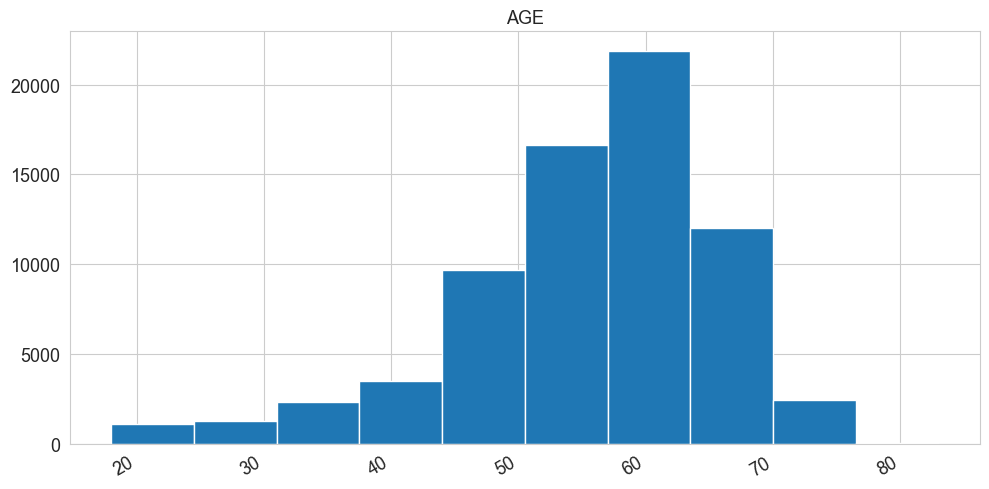

In [132]:
ds.var.numericas.histplot(['AGE'], figsize = (10,5))
plt.show();

A maior parte das pessoas que fazem transplante de fígado têm entre 50 e 70 anos.

---
Qual faixa de idade tende a ter a maior taxa de sobrevivência durante a cirurgia?

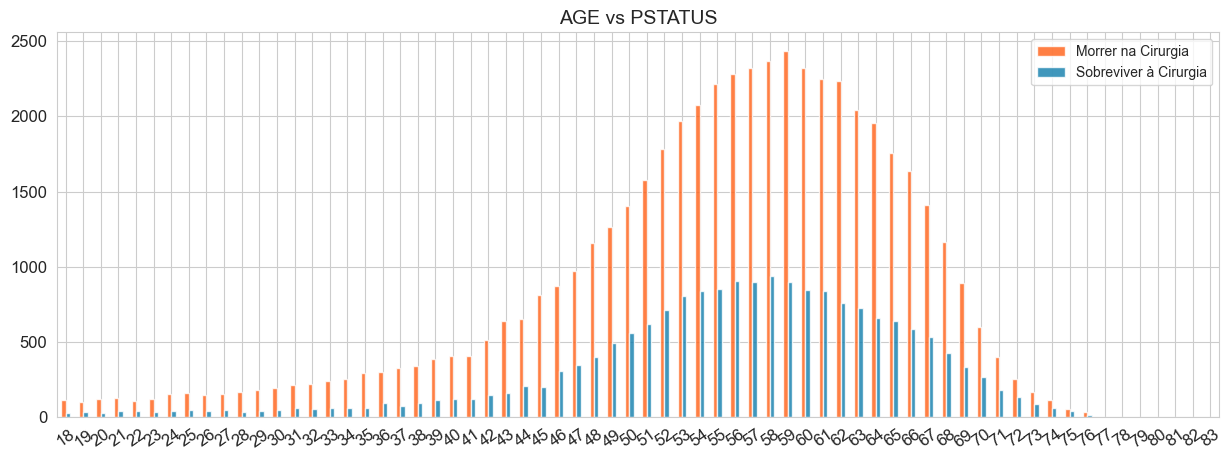

In [177]:
ds.var.categoricas.crosstab.plot(['AGE'], ['PSTATUS'], color=['#' + 'FF5F15', '#' + '107dac'], alpha = 0.8)
plt.legend(labels = ['Morrer na Cirurgia', 'Sobreviver à Cirurgia'])
plt.show();

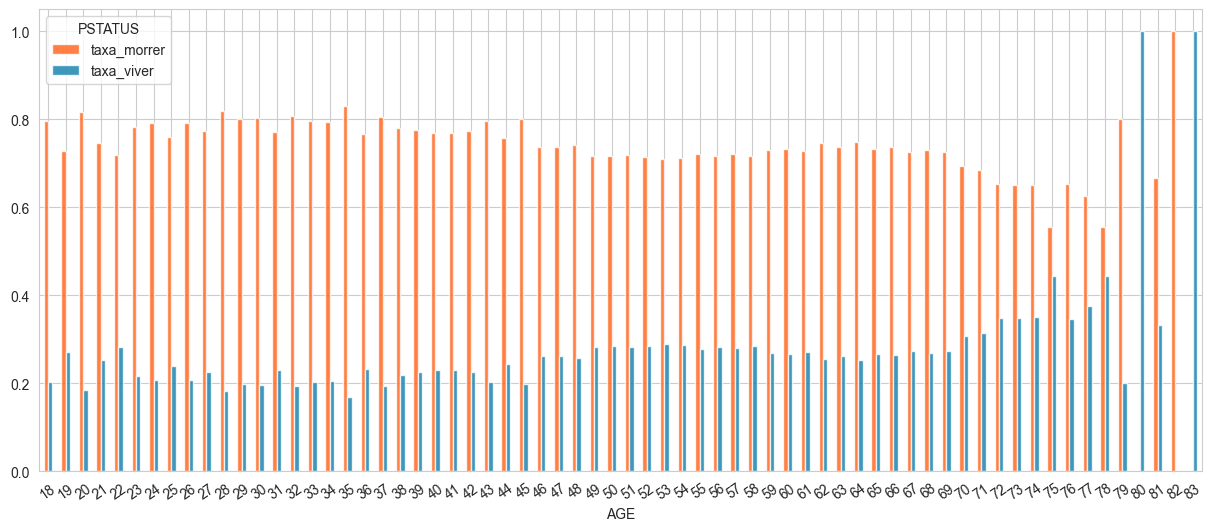

In [176]:
age_ps = ds.var.categoricas.crosstab.show(['AGE'], ['PSTATUS']).reset_index()
age_ps['taxa_0'] = age_ps[0] / np.sum(age_ps[0])
age_ps['taxa_1'] = age_ps[1] / np.sum(age_ps[1])
age_ps['taxa_total_0'] = age_ps[0] / (np.sum(age_ps[0]) + np.sum(age_ps[1]))
age_ps['taxa_total_1'] = age_ps[1] / (np.sum(age_ps[0]) + np.sum(age_ps[1]))
age_ps['taxa_viver'] = age_ps[1] / (age_ps[0] + age_ps[1])
age_ps['taxa_morrer'] = age_ps[0] / (age_ps[0] + age_ps[1])

age_ps[['taxa_morrer', 'taxa_viver', 'AGE']].set_index('AGE').plot(
    kind = 'bar', figsize = (15,6), color=['#' + 'FF5F15', '#' + '107dac'], alpha = 0.8)
plt.xticks(rotation = 35)
plt.show();

### Interpretando os dois gráficos acima:
- **Gráfico 1:** O gráfico primeiramente confirma que a maior parte dos pacientes estão na faixa de 50 a 70 anos, porém tambem mostra que, para este conjunto de dados, as pessoas tendem a morrer bem mais do que sobrevive durante a cirurgia.

- **Gráfico 2:** O gráfico mostra que, para este conjunto de dados, por incrível que pareça, quanto maior a idade do paciente as chances de sobreviver à cirurgia são levemente maiores.

---
Quantos anos as pessoas vivem em média após o transplante de fígado?

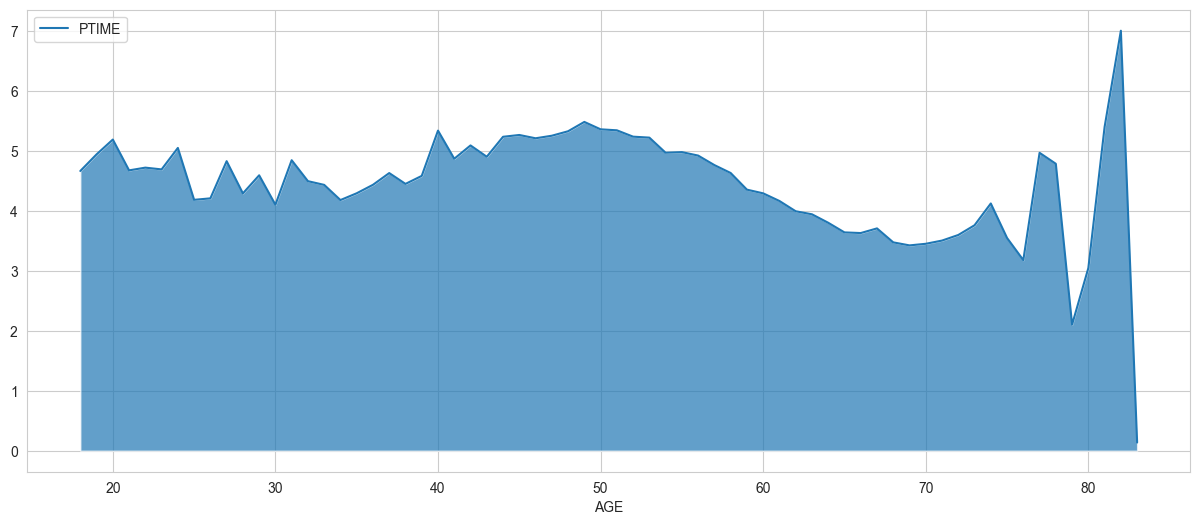

In [131]:
age_ptime = ds.groupby('AGE').agg({'PTIME':'mean'}) / 365
age_ptime.plot(linewidth = 1.5, figsize = (15,6))
plt.fill_between(x = age_ptime.index, y1 = age_ptime['PTIME'], alpha = 0.7)
plt.show();

O gráfico mostra que as pessoas vivem em média 5 anos após o transplante de fígado

---
Qual a distribuição de idade dos doadores de fígado?

A parentemente não há idade específica para as pessoas que decidem doar o fígado. A distribuição se extende desde os 20 aos 65 anos (em sua grande maioria)

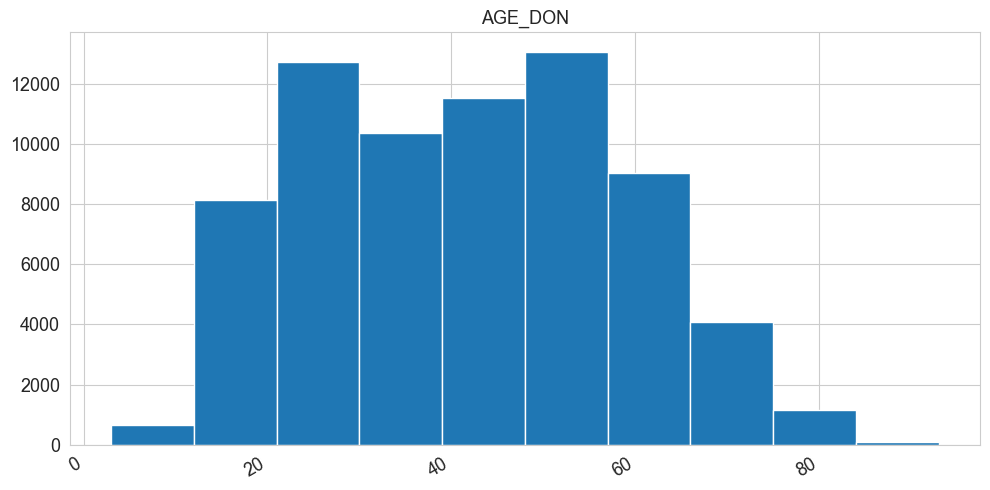

In [23]:
ds.var.numericas.histplot(['AGE_DON'], figsize = (10,5))